## SPAM DETECTION

## PROGETTO SPAM DETECTION
### L'azienda ProfessionAI vuole realizzare una libreria capace di fare analisi delle email ricevute. 
### Nello specifico, il CEO ha richiesto di identificare le email di tipo SPAM sulle quali fare analisi contenutistiche.
### Il CTO nello specifico ti fornisce un dataset e ti chiede di:
### 1) Addestrare un classificatore per identificare SPAM
### 2) Individuare i Topic principali tra le email SPAM presenti nel dataset
### 3) Calcolare la distanza semantica tra i topics ottenuti, per dedurne l'eterogeneità.
### 4) Estrarre dalle mail NON SPAM le Organizzazioni presenti.

In [1]:
import pandas as pd
import string
import spacy
from nltk.corpus import stopwords
import re
from scipy import spatial
import numpy as np
from gensim.models import Word2Vec

from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,  confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_learning_curves


In [2]:
dataset = pd.read_csv('datasets/Verifica Finale - Spam Detection/spam_dataset.csv')

In [3]:
english_stopwords = stopwords.words('english')
nlp = spacy.load('en_core_web_sm')
punctuation = set(string.punctuation)

def data_cleaner(sentence):
    sentence = sentence.lower()
    for c in string.punctuation:
        sentence = sentence.replace(c, " ")
    document = nlp(sentence)
    sentence = ' '.join(token.lemma_ for token in document)
    sentence = ' '.join(word for word in sentence.split() if word not in english_stopwords)
    sentence = re.sub('\d', '', sentence)
    
    return sentence

In [4]:
dataset['cleaned_text'] = dataset['text'].apply(data_cleaner)

1) classificatore per l'identificazione dello spam

In [5]:
X_train, X_test, y_train, y_test = train_test_split(dataset['text'], dataset['label_num'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [22]:
nb_model = MultinomialNB()

nb_model.fit(X_train_tfidf, y_train)

nb_y_pred = nb_model.predict(X_test_tfidf)

nb_accuracy = accuracy_score(y_test, nb_y_pred)
nb_precision = precision_score(y_test, nb_y_pred)
nb_recall = recall_score(y_test, nb_y_pred)
nb_f1 = f1_score(y_test, nb_y_pred)

nb_accuracy, nb_precision, nb_recall, nb_f1

(0.923671497584541, 0.9953703703703703, 0.7337883959044369, 0.8447937131630648)

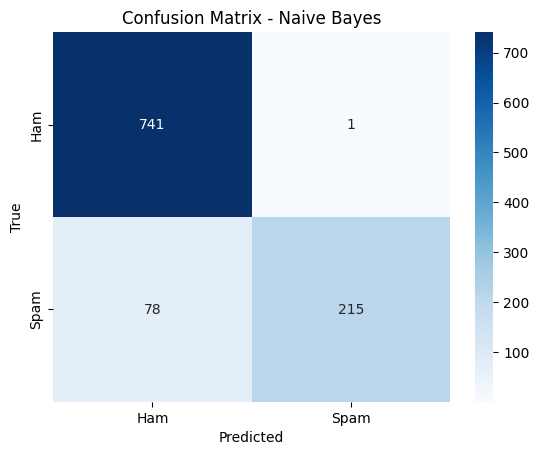

In [23]:
nb_conf_matrix = confusion_matrix(y_test, nb_y_pred)
sns.heatmap(nb_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

In [ ]:
# clf = MLPClassifier(activation='logistic', # per attività di classificazione testuale è consigliato usare la funzione logistica
#                     hidden_layer_sizes=(100,),
#                     max_iter=100,
#                     solver='adam', # per questo tipo di task è consigliato usare l'ottimizzatore adam
#                     tol=0.005,
#                     verbose=True)

# clf.fit(X_train_tfidf,y_train)
# mlp_y_pred = clf.predict(X_test_tfidf)

# mlp_accuracy = accuracy_score(y_test, mlp_y_pred)
# mlp_precision = precision_score(y_test, mlp_y_pred)
# mlp_recall = recall_score(y_test, mlp_y_pred)
# mlp_f1 = f1_score(y_test, mlp_y_pred)

# mlp_accuracy, mlp_precision, mlp_recall, mlp_f1

# mlp_conf_matrix = confusion_matrix(y_test, mlp_y_pred)
# sns.heatmap(mlp_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
# plt.xlabel("Predicted")
# plt.ylabel("True")
# plt.title("Confusion Matrix - MLPClassifier")
# plt.show()

In [33]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,), (200,)],
    'activation': ['logistic', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01]
}

clf = MLPClassifier(max_iter=100, tol=0.005, verbose=True)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_tfidf, y_train)

print("Best parameters found: ", grid_search.best_params_)

best_clf = grid_search.best_estimator_
mlp_y_pred = best_clf.predict(X_test_tfidf)

# Calcolare le metriche di valutazione
mlp_accuracy = accuracy_score(y_test, mlp_y_pred)
mlp_precision = precision_score(y_test, mlp_y_pred)
mlp_recall = recall_score(y_test, mlp_y_pred)
mlp_f1 = f1_score(y_test, mlp_y_pred)

classification_report(y_test, mlp_y_pred)

mlp_accuracy, mlp_precision, mlp_recall, mlp_f1

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Iteration 1, loss = 0.61245220
Iteration 1, loss = 0.65481817
Iteration 1, loss = 0.74249431
Iteration 1, loss = 0.61814244
Iteration 1, loss = 0.62438265
Iteration 1, loss = 0.72531819
Iteration 1, loss = 0.61595171
Iteration 1, loss = 0.73305899
Iteration 1, loss = 0.61079154
Iteration 1, loss = 0.70224608
Iteration 2, loss = 0.60731092
Iteration 2, loss = 0.65404753
Iteration 2, loss = 0.61140022
Iteration 2, loss = 0.62300981
Iteration 2, loss = 0.60921066
Iteration 2, loss = 0.61878844
Iteration 2, loss = 0.57388696
Iteration 1, loss = 0.72900303
Iteration 2, loss = 0.60207280
Iteration 2, loss = 0.57597005
Iteration 2, loss = 0.62311773
Iteration 3, loss = 0.61671726
Iteration 3, loss = 0.60458410
Iteration 1, loss = 0.63047055
Iteration 3, loss = 0.60823417
Iteration 3, loss = 0.60551578
Iteration 1, loss = 0.59348593
Iteration 3, loss = 0.60525529
Iteration 1, loss = 0.61210861
Iteration 1, loss = 0.59932764
Iteratio

(0.9922705314009662,
 0.9863481228668942,
 0.9863481228668942,
 0.9863481228668942)

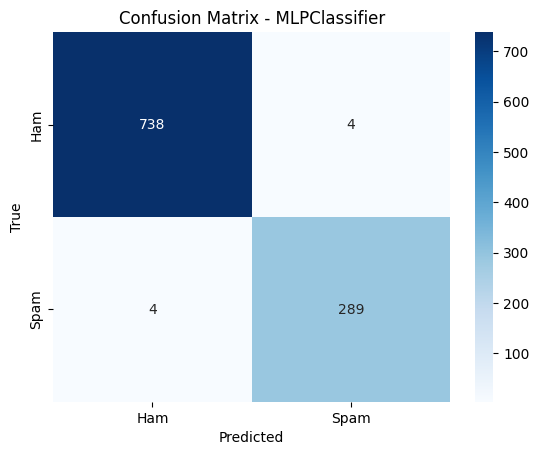

In [34]:
mlp_conf_matrix = confusion_matrix(y_test, mlp_y_pred)
sns.heatmap(mlp_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - MLPClassifier")
plt.show()

Iteration 1, loss = 0.73188595
Iteration 1, loss = 0.70649115
Iteration 1, loss = 0.66524857
Iteration 1, loss = 0.71370742
Iteration 2, loss = 0.68636560
Iteration 2, loss = 0.66481899
Iteration 2, loss = 0.62791409
Iteration 2, loss = 0.67678224
Iteration 1, loss = 0.66561659
Iteration 1, loss = 0.66930175
Iteration 3, loss = 0.64270386
Iteration 1, loss = 0.67253736
Iteration 3, loss = 0.62576355
Iteration 3, loss = 0.59389053
Iteration 3, loss = 0.64018282
Iteration 4, loss = 0.59789416
Iteration 4, loss = 0.58613051
Iteration 4, loss = 0.55827010
Iteration 4, loss = 0.60136402
Iteration 1, loss = 0.67213611
Iteration 5, loss = 0.55389998
Iteration 1, loss = 0.67418530
Iteration 5, loss = 0.54599329
Iteration 1, loss = 0.64912270
Iteration 5, loss = 0.52152394
Iteration 5, loss = 0.56031818
Iteration 2, loss = 0.57346477
Iteration 2, loss = 0.57536245
Iteration 6, loss = 0.51082209
Iteration 2, loss = 0.56915422
Iteration 1, loss = 0.60765943
Iteration 6, loss = 0.50585998
Iteratio

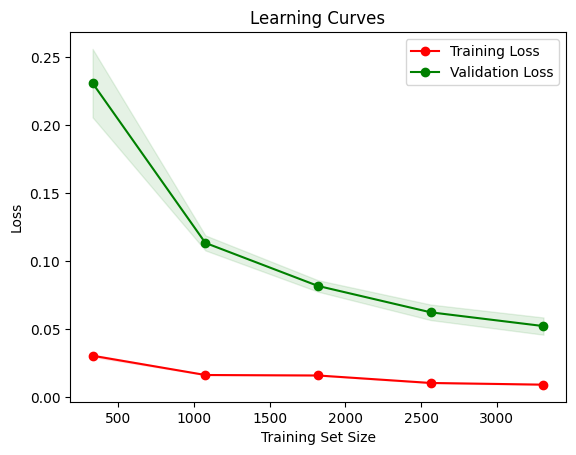

In [37]:
train_sizes, train_scores, val_scores = learning_curve(best_clf, X_train_tfidf, y_train, cv=5, scoring='neg_log_loss', n_jobs=-1)

# Calcolare la media e la deviazione standard delle perdite
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = -np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Tracciare le learning curves
plt.figure()
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training Loss')
plt.plot(train_sizes, val_mean, 'o-', color='g', label='Validation Loss')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='g')
plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [38]:
pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Naive Bayes": [nb_accuracy, nb_precision, nb_recall, nb_f1],
    "MLPClassifier": [mlp_accuracy, mlp_precision, mlp_recall, mlp_f1]
})

,Metric,Naive Bayes,MLPClassifier
0,Accuracy,0.923671,0.992271
1,Precision,0.995370,0.986348
2,Recall,0.733788,0.986348
3,F1-Score,0.844794,0.986348


In [6]:
from pycaret.classification import *

X_train_tfidf_df = pd.DataFrame(X_train_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
X_test_tfidf_df = pd.DataFrame(X_test_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
X_train_tfidf_df['label'] = y_train.values
X_test_tfidf_df['label'] = y_test.values
data = pd.concat([X_train_tfidf_df, X_test_tfidf_df])
train_indices = list(range(len(X_train)))


# Setup l'esperimento con i dati concatenati
s = setup(data=X_train_tfidf, target=y_train, session_id=42, train_size=len(X_train)/len(data))

# Confronta i modelli
best = compare_models()

: 